In [1]:
import pandas as pd
import numpy as np
f = pd.read_csv("cleaned_reddit.csv")


A quick look at the flavors with the most positive refrences 

In [2]:
f.sort_values(["Positive"], ascending=[False]).head()

,Flavor Name,Positive,Negative
87,king,49038,33729
163,strawberry,18265,4732
261,caramel,10032,5130
157,raspberry,6624,2592
334,rob,6537,5258


A quick look at the flavors with the most negative refrences

In [3]:
f.sort_values(["Negative"], ascending=[False]).head()

,Flavor Name,Positive,Negative
87,king,49038,33729
344,watermelon,2338,5320
334,rob,6537,5258
261,caramel,10032,5130
163,strawberry,18265,4732


Raw numbers are nice, but the most commonly mentioned flavors drown out everything else. Why not use percent instead? First Adding a total column to make life easier.

Positive Percent is positive mentions / total mentions

Negative Percent is negative mentions / total mentions


In [4]:
f["Total"] = f["Positive"]+f["Negative"]

In [5]:
f["Percent_Positive"] = f["Positive"]/f["Total"]
f.sort_values(["Percent_Positive", "Total"], ascending=[False, False]).head()

,Flavor Name,Positive,Negative,Total,Percent_Positive
251,cinnamon danish,55,0,55,1.0
168,chocolate cream,27,0,27,1.0
318,caramel original,20,0,20,1.0
211,toasted marshmallow,15,0,15,1.0
180,vanilla butternut,14,0,14,1.0


Here we have sorted the most positive flavors for their percent rating and total rating. We can see Cinnamon Danish is the "most positive" flavor in the data set. 

In [6]:
f["Percent_Negative"] = f["Negative"]/f["Total"]
f.sort_values(["Percent_Negative", "Total"], ascending=[False, False]).head()

,Flavor Name,Positive,Negative,Total,Percent_Positive,Percent_Negative
241,caramel candy,0,32,32,0.0,1.0
268,yougurt,0,22,22,0.0,1.0
170,yumberry,0,13,13,0.0,1.0
165,white out,0,8,8,0.0,1.0
234,apple sour,0,8,8,0.0,1.0


We have sorted the most negative flavors in the same manner we sorted positive flavors. We can see Caramel Candy is the "most negative" flavor followed closely by yougurt.

Finally, some quick figures.


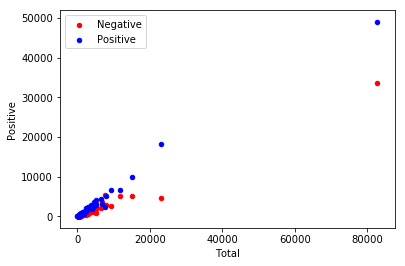

In [7]:
%matplotlib inline
ax = f.plot.scatter(x='Total', y='Negative', color='Red', label='Negative')
f.plot.scatter(x='Total', y='Positive', color='Blue', label='Positive', ax=ax);

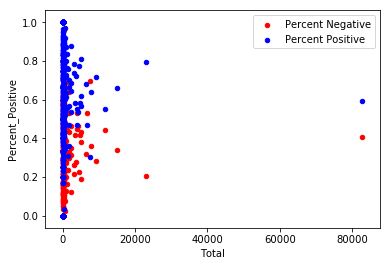

In [8]:
ax = f.plot.scatter(x='Total', y='Percent_Negative', color='Red', label='Percent Negative')
f.plot.scatter(x='Total', y='Percent_Positive', color='Blue', label='Percent Positive', ax=ax);

Here we remove the highest values so generate some clearer figures.

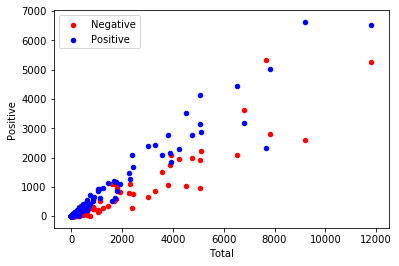

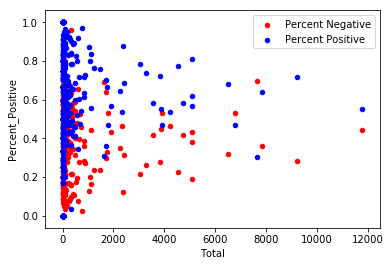

In [9]:
f = f[f["Positive"] < 10000]
f["Total"] = f["Positive"]+f["Negative"]
f["Percent_Positive"] = f["Positive"]/f["Total"]
f["Percent_Negative"] = f["Negative"]/f["Total"]

ax = f.plot.scatter(x='Total', y='Negative', color='Red', label='Negative')
f.plot.scatter(x='Total', y='Positive', color='Blue', label='Positive', ax=ax);


ax = f.plot.scatter(x='Total', y='Percent_Negative', color='Red', label='Percent Negative')
f.plot.scatter(x='Total', y='Percent_Positive', color='Blue', label='Percent Positive', ax=ax);